<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Reinforcement-Learning/windy-grid-world/windy_grid_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The state (position) in grid will follow numpy's indexing system of elements in a NumPy array as per below image such that the origin is at the left upper corner.

**7 Rows**: From **0** till **6**

**10 Columns**: From **0** till **9**

[numpy indexing image source](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html)

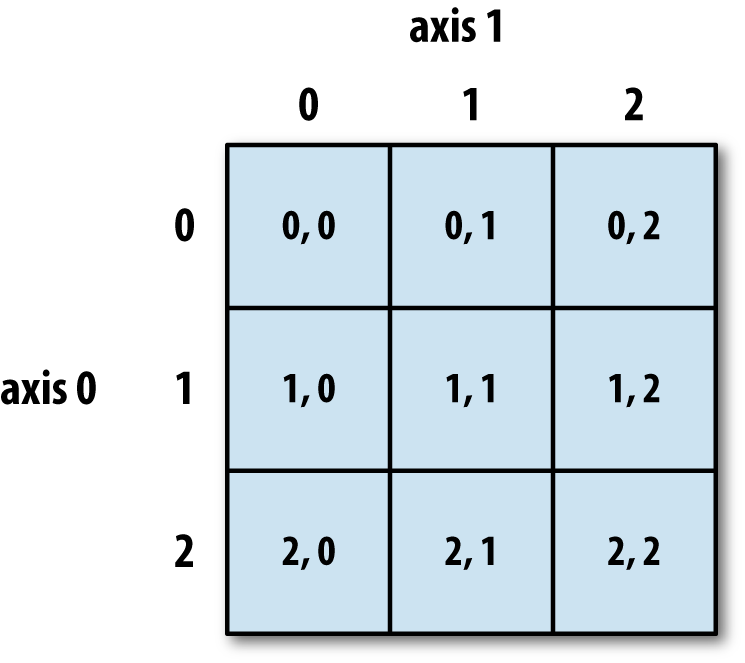

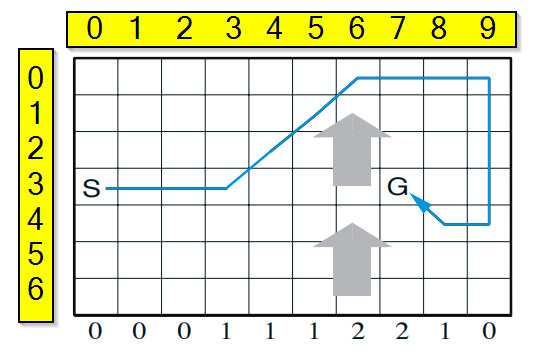

* In this notebook we implemented **Sarsa** and **Q-Learning** for the windy grid world in 2 cases. Case one we have only 4 actions available (north, south, east, west) with deterministic wind value for each column. In the second case we have 8 actions availalbe (king's moves) with stochastic wind.

* We implemented each case alone in a separate cell although we could have used functions to avoid repeating the same code multiple times for the 4 cases but for simplicity and easier understanding for each case as it is we had unfortunately to repeat common functionality code snippets for each case.

* We first start with case one showing Sarsa and Q-Learning performance then we implement Sarsa and Q-Learning algorithms for the second case.

Needed libraries importing.

In [ ]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import make_subplots

# the following code ensures that we can see print results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Grid world properties that will not change in both cases of the 4 actions with deterministic wind and the case of the 8 actions with stochastic wind.

In [ ]:
# grid world dimensions
height = 7 # 0 -> 6
width = 10 # 0 -> 9

# grid word borders
height_max = height -1
width_max = width - 1

# goal position (terminal state)
terminal_state = (3, 7)


"Epsilon Greedy" policy to be used in both cases.

In [ ]:
import random

def epsilon_greedy(state,Q,epsilon = 0.1):

    # possible actions
    act_space = np.arange(num_actions) # [0 1 2 3]

    rand = random.uniform(0,1)
    if rand <= epsilon:# explore - choose a random action
        action = np.random.choice(act_space)

    else : # exploit
        action = np.argmax(Q[state])
    return action

# **Case 1**: Four Actions [N,S,E,W] with Deterministic Wind

In [ ]:
# possible actions
action_space = {"North":0,
                "South":1,
                "East":2,
                "West":3}

# number of actions in action space
num_actions = len(action_space)

# deterministic wind values
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

## **Sarsa** - *4 Actions & Deterministic Wind*

Training

In [ ]:
num_episodes = 600 # number of episodes
gamma_disct = 1 # discount factor
reward = -1.0 # reward for every state expect terminal

sarsa_q_values_dict = {} # dictionary to save the Q function values for each epsilon and alpha pairs
sarsa_time_steps_per_episode_dict = {} # dictionary to save the time steps per episode for each epsilon and alpha pairs
sarsa_accum_time_steps_per_episode_dict = {} # dictionary to save the accumulated time steps per episode for each epsilon and alpha pairs
sarsa_rewards_per_episode_dict = {} # dictionary to save the accrued rewards per episode for each epsilon alpha pair


for epsilon in [0.01, 0.05, 0.1, 0.15, 0.2]: # epsilon greedy exploration rate
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: # learning rate

        # quality function grid values -> Dictionary - keys: state(as a tuple) , values: action values (as an array where index is action)
        Q = defaultdict(lambda: np.zeros(num_actions))

        sarsa_time_steps_per_episode =[] # time steps till terminal state
        sarsa_rewards_per_episode = [] # rewards per episode

        for episode in range(num_episodes):

            # number of time steps taken during current episode
            sarsa_time_steps = 0

            # accrued rewards during current episode
            sarsa_ep_reward = 0

            # starting position (chosen randomly - exploring starts)
            state = (np.random.choice(range(7)), np.random.choice(range(10)))
            while state == terminal_state: # making sure that we dont start at the terminal state
                state = (np.random.choice(range(7)), np.random.choice(range(10)))

            # action taken based on epsilon greedy policy
            action = epsilon_greedy(state, Q, epsilon)

            # keep going from one state to the other untill we reach the terminal state (represents an episode)
            while state != terminal_state:

                row, col = state

                if action == action_space["North"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state =  (max(row - 1 - wind[col], 0), col)

                elif action == action_space["South"]:
                    # min of row value with maximum height ensures we dont go off grid from the southern border as last row value will be 6
                    # max row value with zero ensures we dont go off grid from the nourthern border in case we are near it and experience wind value of 2
                    next_state =  (max(min(row + 1 - wind[col], height_max), 0), col)

                elif action == action_space["East"]:
                    # min of col value with maximum width ensures we dont go off grid from the eastern border as last col value will be 9
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state = (max(row - wind[col], 0), min(col + 1, width_max))

                elif action == action_space["West"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    # max of col value with maximum zero ensures we dont go off grid from the western border as min col value will be 0
                    next_state = (max(row - wind[col], 0), max(col - 1, 0))

                # next action taken based on epsilon greedy policy
                next_action =  epsilon_greedy(next_state, Q, epsilon)

                # Sarsa update
                Q[state][action] =  Q[state][action] + alpha * (reward + (gamma_disct * Q[next_state][next_action]) - Q[state][action])

                sarsa_ep_reward += -1
                state = next_state
                action = next_action
                sarsa_time_steps += 1


            sarsa_time_steps_per_episode.append(sarsa_time_steps)
            sarsa_rewards_per_episode.append(sarsa_ep_reward)


        sarsa_time_steps_per_episode_accum = np.cumsum(sarsa_time_steps_per_episode)

        sarsa_q_values_dict[(epsilon, alpha)] = Q
        sarsa_time_steps_per_episode_dict[(epsilon, alpha)] = sarsa_time_steps_per_episode
        sarsa_accum_time_steps_per_episode_dict[(epsilon, alpha)] = sarsa_time_steps_per_episode_accum
        sarsa_rewards_per_episode_dict[(epsilon, alpha)] = sarsa_rewards_per_episode


Plotting

In [ ]:
# plotting the different accumulated time steps for each epsilon and alpha
fig = make_subplots(rows=1,cols=1)
for key,values in sarsa_accum_time_steps_per_episode_dict.items():
    fig.append_trace(go.Scatter(x=values,
                                y=np.arange(1, len(values) + 1),
                                name= "epsilon = {}, alpha= {}".format(key[0],key[1]),
                                mode ='lines',
                                hoverlabel=dict(namelength=-1)
                                ),
                     row=1,
                     col=1)

fig.update_layout(title =  "Sarsa Accumulated Time Steps for Different Epsilon and Alpha",
                  xaxis_title = "Time Steps",
                  yaxis_title = "Episodes")


# obtaining the optimal epsilon and alpha pair based in the smallest average number of steps taken across all episodes
sarsa_eps_alpha_pair = [] # list of epsilon_alpha pairs
sarsa_steps_taken = [] # list of lists of steps taken for each epsilon_alpha pair

for key,values in sarsa_time_steps_per_episode_dict.items():
    sarsa_eps_alpha_pair.append(key)
    sarsa_steps_taken.append(values)

sarsa_steps_taken = np.array(sarsa_steps_taken) # converting list to numpy array
mean_steps_taken = np.mean(sarsa_steps_taken, axis =1) # calculating mean number of steps for each epsilon_alpha pair
min_mean_steps_index = np.argmin(mean_steps_taken) # getting the index of the smallest mean number of steps
sarsa_optimal_epsilon_alpha_pair = sarsa_eps_alpha_pair[min_mean_steps_index] # using the obtained index to get the corresponds optimal epsilon alpha pair values
print(f"optimal epsilon is {sarsa_optimal_epsilon_alpha_pair[0]}, optimal alpha is {sarsa_optimal_epsilon_alpha_pair[1]}, with average number of steps: {np.min(mean_steps_taken)}")


optimal epsilon is 0.01, optimal alpha is 0.9, with average number of steps: 15.578333333333333


Text(0.5, 1.0, 'SARSA Accumulated Time Steps')

Text(0.5, 0, 'Time steps')

Text(0, 0.5, 'Episodes')

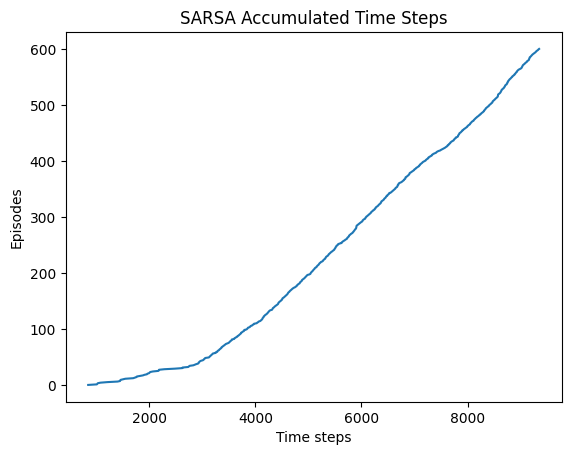

Text(0.5, 1.0, 'SARSA Convergence')

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

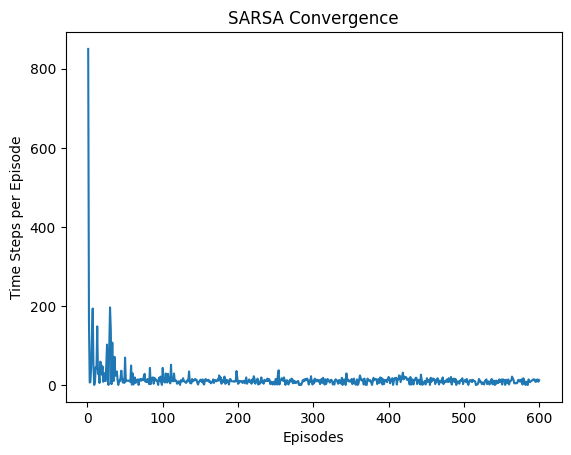

Text(0.5, 1.0, 'SARSA Rewards')

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

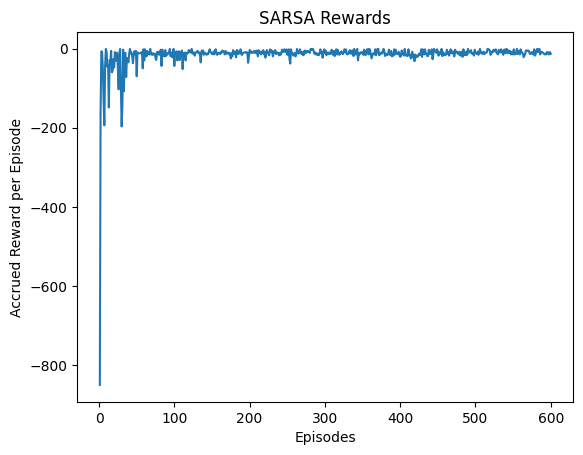

SARSA Optimal Policy:
['↓' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
['↓' '↓' '→' '→' '→' '→' '→' '→' '↑' '↓']
['→' '→' '→' '→' '→' '↑' '←' '→' '↑' '↓']
['→' '→' '→' '→' '↑' '→' '→' 'G' '→' '↓']
['↓' '↑' '→' '→' '→' '→' '→' '↓' '←' '←']
['↑' '→' '→' '↑' '→' '→' '→' '↓' '→' '←']
['↑' '→' '→' '→' '↓' '→' '↓' '↑' '↑' '←']
['0' '0' '0' '1' '1' '1' '2' '2' '1' '0']


In [ ]:
plt.plot(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], np.arange(1, len(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1))
plt.title('SARSA Accumulated Time Steps')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

plt.plot(np.arange(1, len(sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair])
plt.title('SARSA Convergence')
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.show()

plt.plot(np.arange(1, len(sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair])
plt.title('SARSA Rewards')
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.show()

# optimal policy visualization
sarsa_policy = np.zeros([height, width], dtype = str)

for row in range(0, height):
    for col in range(0, width):

        if (row, col) == terminal_state:
            sarsa_policy[row,col] = 'G'
            continue

        best_action = np.argmax(sarsa_q_values_dict[sarsa_optimal_epsilon_alpha_pair][(row, col)])

        if best_action == action_space["North"]:
            sarsa_policy[row,col] = '↑'
        elif best_action == action_space["South"]:
            sarsa_policy[row,col] = '↓'
        elif best_action == action_space["East"]:
            sarsa_policy[row,col] = '→'
        elif best_action == action_space["West"]:
            sarsa_policy[row,col] = '←'

print('SARSA Optimal Policy:')
for row in np.append(sarsa_policy, [np.array(wind)], axis=0):
    print(row)

## **Q-Learning** - *4 Actions & Deterministic Wind*

Training

In [ ]:
num_episodes = 600
gamma_disct = 1 # discount factor
reward = -1.0 # reward for every state expect terminal

ql_q_values_dict = {} # dictionary to save the Q function values for each epsilon and alpha pairs
ql_time_steps_per_episode_dict = {} # dictionary to save the time steps per episode for each epsilon and alpha pairs
ql_accum_time_steps_per_episode_dict = {} # dictionary to save the accumulated time steps per episode for each epsilon and alpha pairs
ql_rewards_per_episode_dict = {} # dictionary to save the accrued rewards per episode for each epsilon alpha pair

for epsilon in [0.01, 0.05, 0.1, 0.15, 0.2]: # epsilon greedy exploration rate
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: # learning rate

        # quality function grid values -> Dictionary - keys: state(as a tuple) , values: action values (as an array where index is action)
        Q_l = defaultdict(lambda: np.zeros(num_actions))

        ql_time_steps_per_episode =[] # time steps till terminal state
        ql_rewards_per_episode = [] # rewards per episode

        for episode in range(num_episodes):

            # number of time steps taken during current episode
            ql_time_steps = 0

            # accrued rewards during current episode
            ql_ep_reward = 0

            # starting position (chosen randomly - exploring starts)
            state = (np.random.choice(range(7)), np.random.choice(range(10)))
            while state == terminal_state: # making sure that we dont start at the terminal state
                state = (np.random.choice(range(7)), np.random.choice(range(10)))

            # action taken based on epsilon greedy policy
            action = epsilon_greedy(state, Q_l, epsilon)

            # keep going from one state to the other untill we reach the terminal state (represents an episode)
            while state != terminal_state:

                row, col = state

                if action == action_space["North"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state =  (max(row - 1 - wind[col], 0), col)

                elif action == action_space["South"]:
                    # min of row value with maximum height ensures we dont go off grid from the southern border as last row value will be 6
                    # max row value with zero ensures we dont go off grid from the nourthern border in case we are near it and experience wind value of 2
                    next_state =  (max(min(row + 1 - wind[col], height_max), 0), col)

                elif action == action_space["East"]:
                    # min of col value with maximum width ensures we dont go off grid from the eastern border as last col value will be 9
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state = (max(row - wind[col], 0), min(col + 1, width_max))

                elif action == action_space["West"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    # max of col value with maximum zero ensures we dont go off grid from the western border as min col value will be 0
                    next_state = (max(row - wind[col], 0), max(col - 1, 0))


                # Q-Learning update
                Q_l[state][action] =  Q_l[state][action] + alpha * (reward + (gamma_disct * max(Q_l[next_state])) - Q_l[state][action])


                ql_ep_reward += -1
                next_action =  epsilon_greedy(next_state, Q_l, epsilon)
                state = next_state
                action = next_action
                ql_time_steps += 1


            ql_time_steps_per_episode.append(ql_time_steps)
            ql_rewards_per_episode.append(ql_ep_reward)


        ql_time_steps_per_episode_accum = np.cumsum(ql_time_steps_per_episode)

        ql_q_values_dict[(epsilon, alpha)] = Q_l
        ql_time_steps_per_episode_dict[(epsilon, alpha)] = ql_time_steps_per_episode
        ql_accum_time_steps_per_episode_dict[(epsilon, alpha)] = ql_time_steps_per_episode_accum
        ql_rewards_per_episode_dict[(epsilon, alpha)] = ql_rewards_per_episode

Plotting

In [ ]:
# plotting the different accumulated time steps for each epsilon and alpha
fig = make_subplots(rows=1,cols=1)
for key,values in ql_accum_time_steps_per_episode_dict.items():
    fig.append_trace(go.Scatter(x=values,
                                y=np.arange(1, len(values) + 1),
                                name= "epsilon = {}, alpha= {}".format(key[0],key[1]),
                                mode ='lines',
                                hoverlabel=dict(namelength=-1)
                                ),
                     row=1,
                     col=1)

fig.update_layout(title =  "Q-Learning Accumulated Time Steps for Different Epsilon and Alpha",
                  xaxis_title = "Time Steps",
                  yaxis_title = "Episodes")


# obtaining the optimal epsilon and alpha pair based in the smallest average number of steps taken across all episodes
ql_eps_alpha_pair = [] # list of epsilon_alpha pairs
ql_steps_taken = [] # list of lists of steps taken for each epsilon_alpha pair

for key,values in ql_time_steps_per_episode_dict.items():
    ql_eps_alpha_pair.append(key)
    ql_steps_taken.append(values)

ql_steps_taken = np.array(ql_steps_taken) # converting list to numpy array
mean_steps_taken = np.mean(ql_steps_taken, axis =1) # calculating mean number of steps for each epsilon_alpha pair
min_mean_steps_index = np.argmin(mean_steps_taken) # getting the index of the smallest mean number of steps
ql_optimal_epsilon_alpha_pair = ql_eps_alpha_pair[min_mean_steps_index] # using the obtained index to get the corresponds optimal epsilon alpha pair values
print(f"optimal epsilon is {ql_optimal_epsilon_alpha_pair[0]}, optimal alpha is {ql_optimal_epsilon_alpha_pair[1]}, with average number of steps: {np.min(mean_steps_taken)}")

optimal epsilon is 0.01, optimal alpha is 1, with average number of steps: 14.31


Text(0.5, 1.0, 'Q-Learning Accumulated Time Steps')

Text(0.5, 0, 'Time steps')

Text(0, 0.5, 'Episodes')

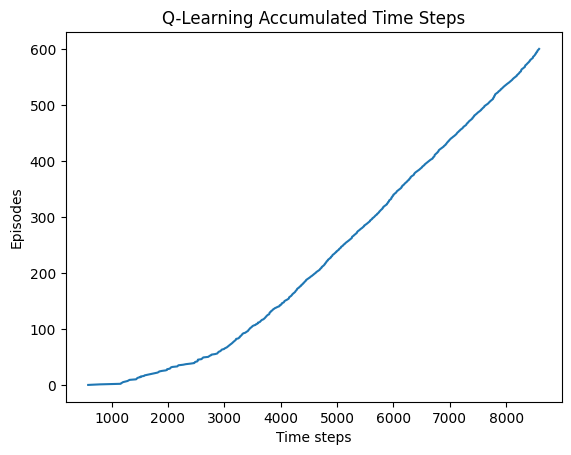

Text(0.5, 1.0, 'Q-Learning Convergence')

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time steps per Episode')

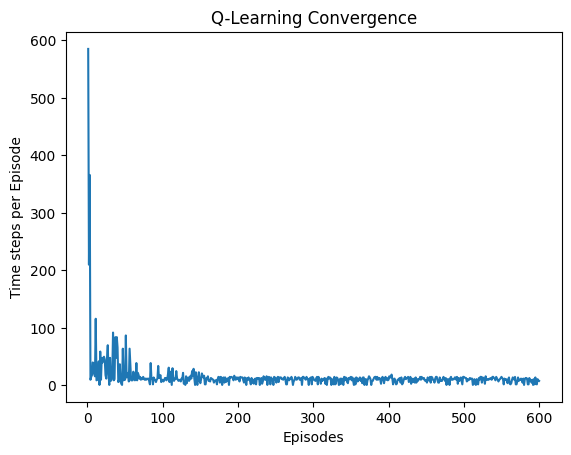

Text(0.5, 1.0, 'Q-Learning Rewards')

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

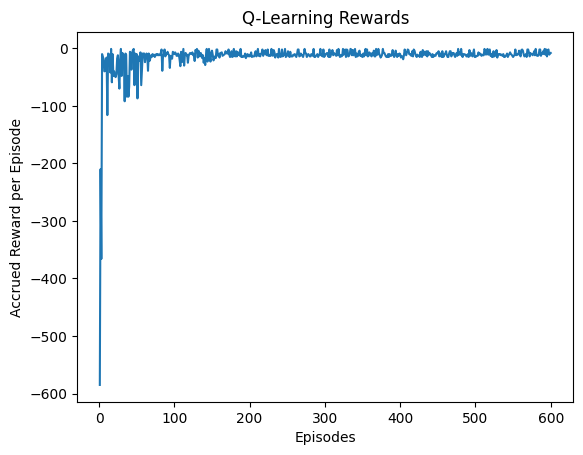

Q-Learning Optimal Policy:
['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
['→' '→' '→' '→' '→' '→' '→' 'G' '→' '↓']
['→' '→' '→' '→' '→' '→' '→' '↓' '←' '←']
['→' '→' '→' '→' '→' '→' '→' '↓' '←' '↑']
['→' '→' '→' '→' '→' '→' '↓' '↑' '↑' '←']
['0' '0' '0' '1' '1' '1' '2' '2' '1' '0']


In [ ]:
plt.plot(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair], np.arange(1, len(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1))
plt.title('Q-Learning Accumulated Time Steps')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()


plt.plot(np.arange(1, len(ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair])
plt.title('Q-Learning Convergence')
plt.xlabel('Episodes')
plt.ylabel('Time steps per Episode')
plt.show()


plt.plot(np.arange(1, len(ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair])
plt.title('Q-Learning Rewards')
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.show()

# optimal policy visualization
ql_policy = np.zeros([height, width], dtype = str)

for row in range(0, height):
    for col in range(0, width):

        if (row, col) == terminal_state:
            ql_policy[row,col] = 'G'
            continue

        best_action = np.argmax(ql_q_values_dict[ql_optimal_epsilon_alpha_pair][(row, col)])

        if best_action == action_space["North"]:
            ql_policy[row,col] = '↑'
        elif best_action == action_space["South"]:
            ql_policy[row,col] = '↓'
        elif best_action == action_space["East"]:
            ql_policy[row,col] = '→'
        elif best_action == action_space["West"]:
            ql_policy[row,col] = '←'

print('Q-Learning Optimal Policy:')
for row in np.append(ql_policy, [np.array(wind)], axis=0):
    print(row)

## **Sarsa VS Q-Learning** - *4 Actions & Deterministic Wind*

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Time steps')

Text(0, 0.5, 'Episodes')

Text(0.5, 1.0, 'Sarsa VS Q-Learning Accumulated Time Steps')

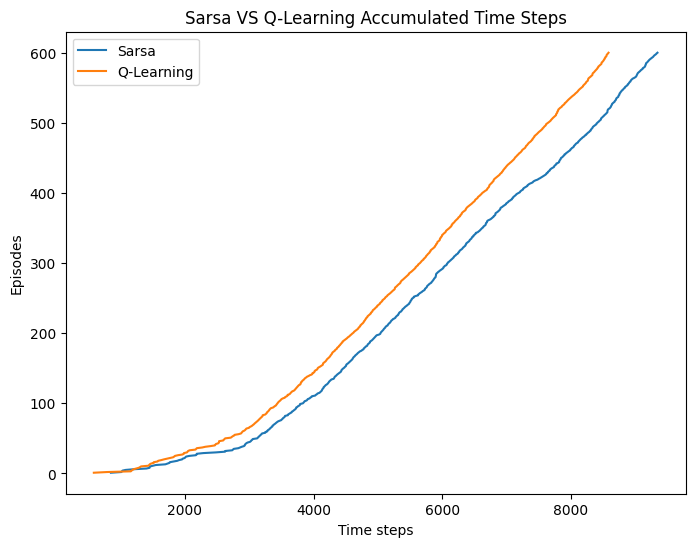

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

Text(0.5, 1.0, 'Sarsa Vs Q-Learning Convergence')

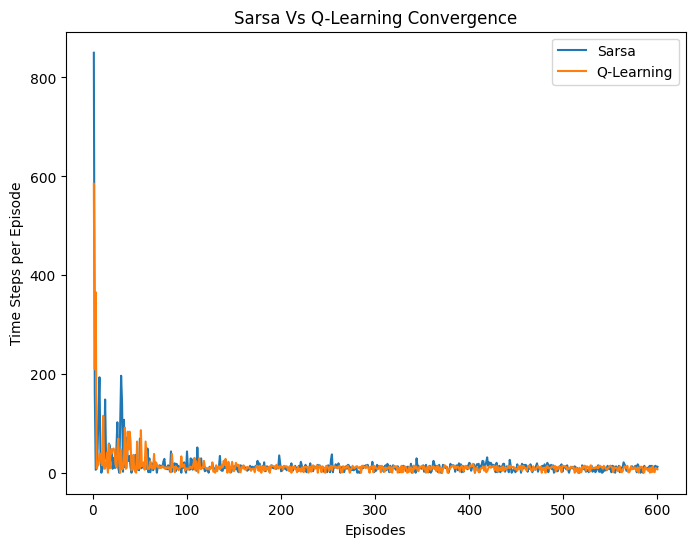

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

Text(0.5, 1.0, 'Sarsa VS Q-Learning Rewards')

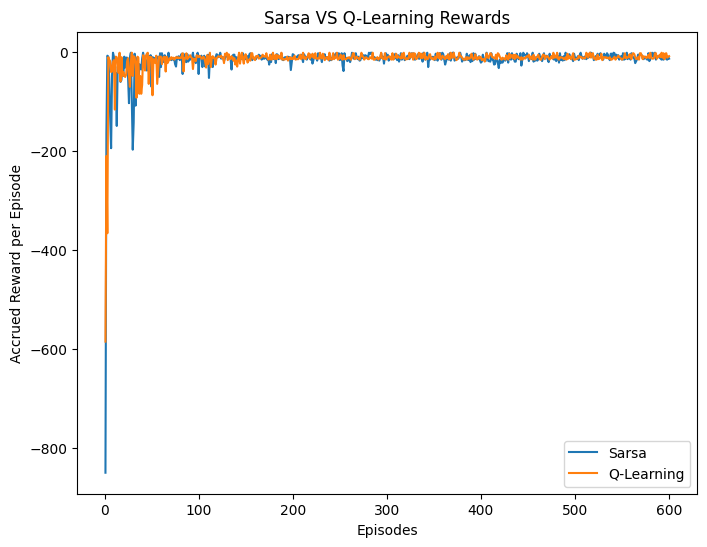

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], np.arange(1, len(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), label = 'Sarsa')
plt.plot(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair], np.arange(1, len(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), label = 'Q-Learning')
plt.legend()
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.title('Sarsa VS Q-Learning Accumulated Time Steps')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], label = 'Sarsa')
plt.plot(np.arange(1, len(ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair],label = 'Q-Learning')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.title('Sarsa Vs Q-Learning Convergence')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], label = 'Sarsa')
plt.plot(np.arange(1, len(ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair],label = 'Q-Learning')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.title('Sarsa VS Q-Learning Rewards')
plt.show()



# **Case 2**: King's Moves [N,S,E,W,NE,NW,SE,SW] with Stochastic Wind

In [ ]:
# 8 possible actions
action_space = {"North":0,
                "South":1,
                "East":2,
                "West":3,
                "North_East":4,
                "North_West":5,
                "South_East":6,
                "South_West":7,}

# number of actions in action space
num_actions = len(action_space)

# stochastic wind values
rnd_wind = [0,
            0,
            0,
            np.random.choice([0,1,2]), # mean wind value  = 1
            np.random.choice([0,1,2]), # mean wind value  = 1
            np.random.choice([0,1,2]), # mean wind value  = 1
            np.random.choice([1,2,3]), # mean wind value  = 2
            np.random.choice([1,2,3]), # mean wind value  = 2
            np.random.choice([0,1,2]), # mean wind value  = 1
            0]

# mean wind values for visualization puropses in optimal policy display
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

## **Sarsa** - *8 Actions & Stochastic Wind*

Training

In [ ]:
num_episodes = 600
gamma_disct = 1 # discount factor
reward = -1.0 # reward for every state expect terminal

sarsa_q_values_dict = {} # dictionary to save the Q function values for each epsilon and alpha pairs
sarsa_time_steps_per_episode_dict = {} # dictionary to save the time steps per episode for each epsilon and alpha pairs
sarsa_accum_time_steps_per_episode_dict = {} # dictionary to save the accumulated time steps per episode for each epsilon and alpha pairs
sarsa_rewards_per_episode_dict = {} # dictionary to save the accrued rewards per episode for each epsilon alpha pair

for epsilon in [0.01, 0.05, 0.1, 0.15, 0.2]: # epsilon greedy exploration rate
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: # learning rate

        # quality function grid values -> Dictionary - keys: state(as a tuple) , values: action values (as an array where index is action)
        Q = defaultdict(lambda: np.zeros(num_actions))

        sarsa_time_steps_per_episode =[] # time steps till terminal state
        sarsa_rewards_per_episode = [] # rewards per episode

        for episode in range(num_episodes):

            # number of time steps taken during current episode
            sarsa_time_steps = 0

            # accrued rewards during current episode
            sarsa_ep_reward = 0

            # starting position (chosen randomly - exploring starts)
            state = (np.random.choice(range(7)), np.random.choice(range(10)))
            while state == terminal_state: # making sure that we dont start at the terminal state
                state = (np.random.choice(range(7)), np.random.choice(range(10)))

            # action taken based on epsilon greedy policy
            action = epsilon_greedy(state, Q, epsilon)

            # keep going from one state to the other untill we reach the terminal state (represents an episode)
            while state != terminal_state:

                row, col = state

                if action == action_space["North"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state =  (max(row - 1 - rnd_wind[col], 0), col)

                elif action == action_space["South"]:
                    # min of row value with maximum height ensures we dont go off grid from the southern border as last row value will be 6
                    # max row value with zero ensures we dont go off grid from the nourthern border in case we are near it and experience wind value of 2
                    next_state =  (max(min(row + 1 - rnd_wind[col], height_max), 0), col)

                elif action == action_space["East"]:
                    # min of col value with maximum width ensures we dont go off grid from the eastern border as last col value will be 9
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state = (max(row - rnd_wind[col], 0), min(col + 1, width_max))

                elif action == action_space["West"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    # max of col value with maximum zero ensures we dont go off grid from the western border as min col value will be 0
                    next_state = (max(row - rnd_wind[col], 0), max(col - 1, 0))

                # King's Moves

                elif action == action_space["North_East"]:
                    next_state = (max(row - 1 - rnd_wind[col], 0), min(col + 1, width_max))

                elif action == action_space["North_West"]:
                    next_state = (max(row - 1 - rnd_wind[col], 0), max(col - 1, 0))

                elif action == action_space["South_East"]:
                    next_state = (max(min(row + 1 - rnd_wind[col], height_max), 0), min(col + 1, width_max))

                elif action == action_space["South_West"]:
                    next_state = (max(min(row + 1 - rnd_wind[col], height_max), 0), max(col - 1, 0))

                # next action taken based on epsilon greedy policy
                next_action =  epsilon_greedy(next_state, Q, epsilon)

                # Sarsa update
                Q[state][action] =  Q[state][action] + alpha * (reward + (gamma_disct * Q[next_state][next_action]) - Q[state][action])

                sarsa_ep_reward += -1
                state = next_state
                action = next_action
                sarsa_time_steps += 1


            sarsa_time_steps_per_episode.append(sarsa_time_steps)
            sarsa_rewards_per_episode.append(sarsa_ep_reward)


        sarsa_time_steps_per_episode_accum = np.cumsum(sarsa_time_steps_per_episode)

        sarsa_q_values_dict[(epsilon, alpha)] = Q
        sarsa_time_steps_per_episode_dict[(epsilon, alpha)] = sarsa_time_steps_per_episode
        sarsa_accum_time_steps_per_episode_dict[(epsilon, alpha)] = sarsa_time_steps_per_episode_accum
        sarsa_rewards_per_episode_dict[(epsilon, alpha)] = sarsa_rewards_per_episode

Plotting

In [ ]:
# plotting the different accumulated time steps for each epsilon and alpha
fig = make_subplots(rows=1,cols=1)
for key,values in sarsa_accum_time_steps_per_episode_dict.items():
    fig.append_trace(go.Scatter(x=values,
                                y=np.arange(1, len(values) + 1),
                                name= "epsilon = {}, alpha= {}".format(key[0],key[1]),
                                mode ='lines',
                                hoverlabel=dict(namelength=-1)
                                ),
                     row=1,
                     col=1)

fig.update_layout(title =  "Sarsa Accumulated Time Steps for Different Epsilon and Alpha in case of King's Moves with Stochastic Wind",
                  xaxis_title = "Time Steps",
                  yaxis_title = "Episodes")


# obtaining the optimal epsilon and alpha pair based in the smallest average number of steps taken across all episodes
sarsa_eps_alpha_pair = [] # list of epsilon_alpha pairs
sarsa_steps_taken = [] # list of lists of steps taken for each epsilon_alpha pair

for key,values in sarsa_time_steps_per_episode_dict.items():
    sarsa_eps_alpha_pair.append(key)
    sarsa_steps_taken.append(values)

sarsa_steps_taken = np.array(sarsa_steps_taken) # converting list to numpy array
mean_steps_taken = np.mean(sarsa_steps_taken, axis =1) # calculating mean number of steps for each epsilon_alpha pair
min_mean_steps_index = np.argmin(mean_steps_taken) # getting the index of the smallest mean number of steps
sarsa_optimal_epsilon_alpha_pair = sarsa_eps_alpha_pair[min_mean_steps_index] # using the obtained index to get the corresponds optimal epsilon alpha pair values
print(f"optimal epsilon is {sarsa_optimal_epsilon_alpha_pair[0]}, optimal alpha is {sarsa_optimal_epsilon_alpha_pair[1]}, with average number of steps: {np.min(mean_steps_taken)}")

optimal epsilon is 0.01, optimal alpha is 0.9, with average number of steps: 10.696666666666667


Text(0.5, 1.0, "SARSA Accumulated Time Steps - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

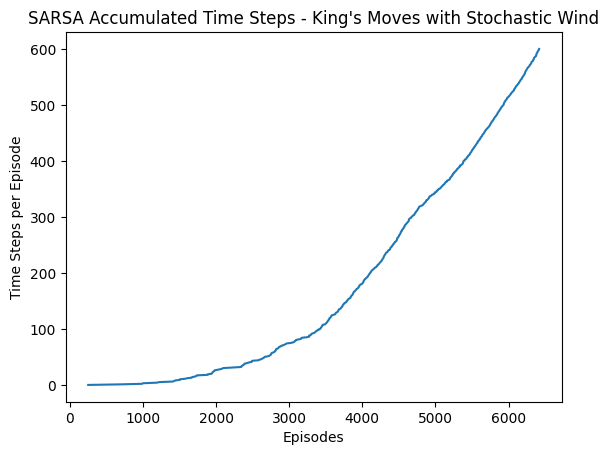

Text(0.5, 1.0, "SARSA Convergence - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

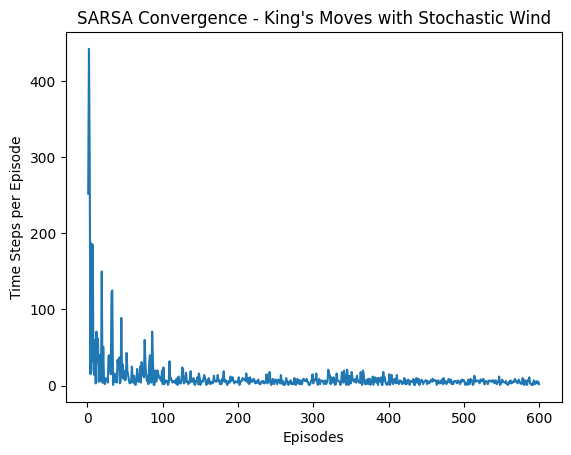

Text(0.5, 1.0, "SARSA Rewards - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

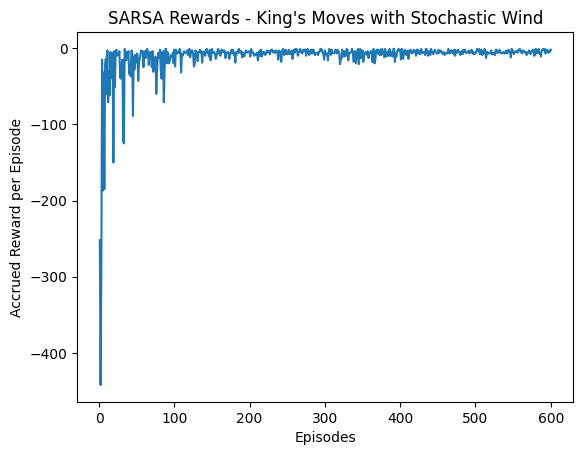

SARSA Optimal Policy for King's Moves and Stochastic Wind:
['↙' '↘' '↓' '↗' '↗' '↘' '→' '→' '↓' '↓']
['↓' '↙' '↙' '↘' '↓' '↓' '↘' '→' '↘' '↓']
['↘' '↘' '↓' '↘' '↘' '↓' '↗' '↗' '↙' '←']
['↘' '↘' '↘' '↘' '↘' '↓' '↓' 'G' '←' '←']
['↘' '↘' '→' '↘' '↘' '↘' '↙' '↘' '↖' '←']
['↗' '↘' '↘' '→' '↘' '↓' '↘' '↓' '←' '↖']
['↘' '↗' '↘' '→' '←' '→' '→' '↘' '↖' '↑']
['0' '0' '0' '1' '1' '1' '2' '2' '1' '0']


In [ ]:
plt.plot(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], np.arange(1, len(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1))
plt.title("SARSA Accumulated Time Steps - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.show()

plt.plot(np.arange(1, len(sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair])
plt.title("SARSA Convergence - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.show()

plt.plot(np.arange(1, len(sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair])
plt.title("SARSA Rewards - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.show()


# optimal policy visualization
sarsa_policy = np.zeros([height, width], dtype = str)

for row in range(0, height):
    for col in range(0, width):

        if (row, col) == terminal_state:
            sarsa_policy[row,col] = 'G'
            continue

        best_action = np.argmax(sarsa_q_values_dict[sarsa_optimal_epsilon_alpha_pair][(row, col)])

        if best_action == action_space["North"]:
            sarsa_policy[row,col] = '↑'
        elif best_action == action_space["South"]:
            sarsa_policy[row,col] = '↓'
        elif best_action == action_space["East"]:
            sarsa_policy[row,col] = '→'
        elif best_action == action_space["West"]:
            sarsa_policy[row,col] = '←'
        # King's Moves
        elif best_action == action_space["North_East"]:
            sarsa_policy[row,col] = '↗️'
        elif best_action == action_space["North_West"]:
            sarsa_policy[row,col] = '↖️'
        elif best_action == action_space["South_East"]:
            sarsa_policy[row,col] = '↘️'
        elif best_action == action_space["South_West"]:
            sarsa_policy[row,col] = '↙️'


print("SARSA Optimal Policy for King's Moves and Stochastic Wind:")
for row in np.append(sarsa_policy, [np.array(wind)], axis=0):
    print(row)

## **Q-Learning** - *8 Actions & Stochastic Wind*

Training

In [ ]:
num_episodes = 600
gamma_disct = 1 # discount factor
reward = -1.0 # reward for every state expect terminal

ql_q_values_dict = {} # dictionary to save the Q function values for each epsilon and alpha pairs
ql_time_steps_per_episode_dict = {} # dictionary to save the time steps per episode for each epsilon and alpha pairs
ql_accum_time_steps_per_episode_dict = {} # dictionary to save the accumulated time steps per episode for each epsilon and alpha pairs
ql_rewards_per_episode_dict = {} # dictionary to save the accrued rewards per episode for each epsilon alpha pair

for epsilon in [0.01, 0.05, 0.1, 0.15, 0.2]: # epsilon greedy exploration rate
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: # learning rate

        # quality function grid values -> Dictionary - keys: state(as a tuple) , values: action values (as an array where index is action)
        Q_l = defaultdict(lambda: np.zeros(num_actions))

        ql_time_steps_per_episode =[] # time steps till terminal state
        ql_rewards_per_episode = [] # rewards per episode

        for episode in range(num_episodes):

            # number of time steps taken during current episode
            ql_time_steps = 0

            # accrued rewards during current episode
            ql_ep_reward = 0

            # starting position (chosen randomly - exploring starts)
            state = (np.random.choice(range(7)), np.random.choice(range(10)))
            while state == terminal_state: # making sure that we dont start at the terminal state
                state = (np.random.choice(range(7)), np.random.choice(range(10)))

            # action taken based on epsilon greedy policy
            action = epsilon_greedy(state, Q_l, epsilon)

            # keep going from one state to the other untill we reach the terminal state (represents an episode)
            while state != terminal_state:

                row, col = state

                if action == action_space["North"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state =  (max(row - 1 - rnd_wind[col], 0), col)

                elif action == action_space["South"]:
                    # min of row value with maximum height ensures we dont go off grid from the southern border as last row value will be 6
                    # max row value with zero ensures we dont go off grid from the nourthern border in case we are near it and experience wind value of 2
                    next_state =  (max(min(row + 1 - rnd_wind[col], height_max), 0), col)

                elif action == action_space["East"]:
                    # min of col value with maximum width ensures we dont go off grid from the eastern border as last col value will be 9
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    next_state = (max(row - rnd_wind[col], 0), min(col + 1, width_max))

                elif action == action_space["West"]:
                    # max of row value with zero ensures we dont go off grid from the northern border as last row value will be zero
                    # max of col value with maximum zero ensures we dont go off grid from the western border as min col value will be 0
                    next_state = (max(row - rnd_wind[col], 0), max(col - 1, 0))

                # King's Moves

                elif action == action_space["North_East"]:
                    next_state = (max(row - 1 - rnd_wind[col], 0), min(col + 1, width_max))

                elif action == action_space["North_West"]:
                    next_state = (max(row - 1 - rnd_wind[col], 0), max(col - 1, 0))

                elif action == action_space["South_East"]:
                    next_state = (max(min(row + 1 - rnd_wind[col], height_max), 0), min(col + 1, width_max))

                elif action == action_space["South_West"]:
                    next_state = (max(min(row + 1 - rnd_wind[col], height_max), 0), max(col - 1, 0))

                # Q-learning update
                Q_l[state][action] =  Q_l[state][action] + alpha * (reward + (gamma_disct * max(Q_l[next_state])) - Q_l[state][action])


                ql_ep_reward += -1

                # next action taken based on epsilon greedy policy
                next_action =  epsilon_greedy(next_state, Q_l, epsilon)

                state = next_state
                action = next_action
                ql_time_steps += 1


            ql_time_steps_per_episode.append(ql_time_steps)
            ql_rewards_per_episode.append(ql_ep_reward)


        ql_time_steps_per_episode_accum = np.cumsum(ql_time_steps_per_episode)

        ql_q_values_dict[(epsilon, alpha)] = Q_l
        ql_time_steps_per_episode_dict[(epsilon, alpha)] = ql_time_steps_per_episode
        ql_accum_time_steps_per_episode_dict[(epsilon, alpha)] = ql_time_steps_per_episode_accum
        ql_rewards_per_episode_dict[(epsilon, alpha)] = ql_rewards_per_episode

Plotting

In [ ]:
# plotting the different accumulated time steps for each epsilon and alpha
fig = make_subplots(rows=1,cols=1)
for key,values in ql_accum_time_steps_per_episode_dict.items():
    fig.append_trace(go.Scatter(x=values,
                                y=np.arange(1, len(values) + 1),
                                name= "epsilon = {}, alpha= {}".format(key[0],key[1]),
                                mode ='lines',
                                hoverlabel=dict(namelength=-1)
                                ),
                     row=1,
                     col=1)

fig.update_layout(title =  "Q-Learning Accumulated Time Steps for Different Epsilon and Alpha in case of King's Moves with Stochastic Wind",
                  xaxis_title = "Time Steps",
                  yaxis_title = "Episodes")


# obtaining the optimal epsilon and alpha pair based in the smallest average number of steps taken across all episodes
ql_eps_alpha_pair = [] # list of epsilon_alpha pairs
ql_steps_taken = [] # list of lists of steps taken for each epsilon_alpha pair

for key,values in ql_time_steps_per_episode_dict.items():
    ql_eps_alpha_pair.append(key)
    ql_steps_taken.append(values)

ql_steps_taken = np.array(ql_steps_taken) # converting list to numpy array
mean_steps_taken = np.mean(ql_steps_taken, axis =1) # calculating mean number of steps for each epsilon_alpha pair
min_mean_steps_index = np.argmin(mean_steps_taken) # getting the index of the smallest mean number of steps
ql_optimal_epsilon_alpha_pair = ql_eps_alpha_pair[min_mean_steps_index] # using the obtained index to get the corresponds optimal epsilon alpha pair values
print(f"optimal epsilon is {ql_optimal_epsilon_alpha_pair[0]}, optimal alpha is {ql_optimal_epsilon_alpha_pair[1]}, with average number of steps: {np.min(mean_steps_taken)}")

optimal epsilon is 0.01, optimal alpha is 1, with average number of steps: 9.343333333333334


Text(0.5, 1.0, "Q-Learning Accumulated Time Steps - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps')

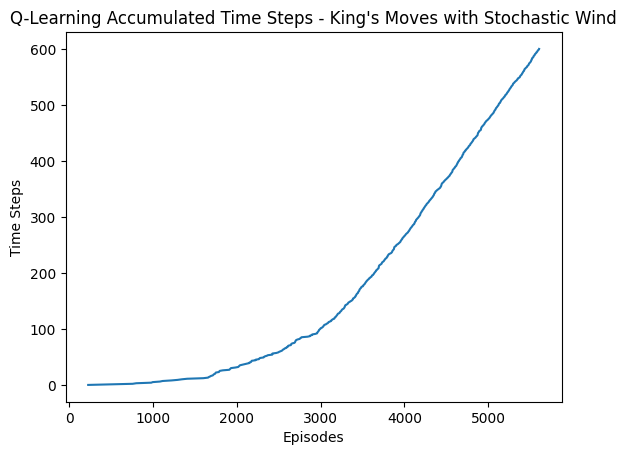

Text(0.5, 1.0, "Q-Learning Convergence - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

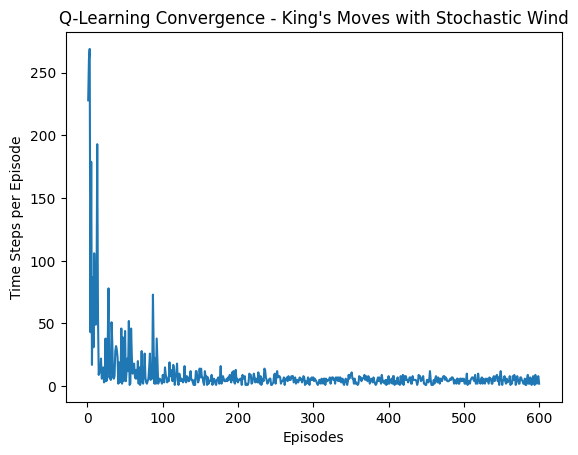

Text(0.5, 1.0, "Q-Learning Rewards - King's Moves with Stochastic Wind")

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

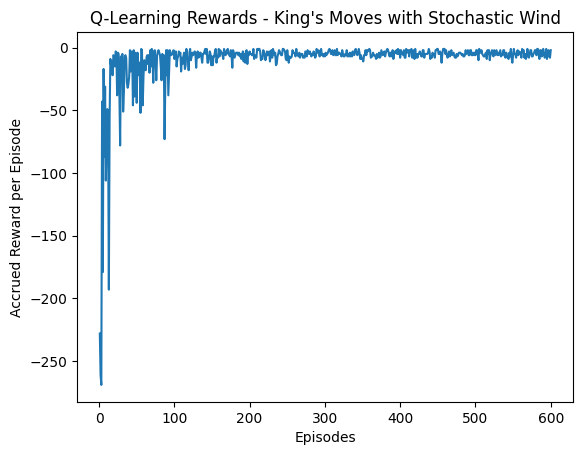

Q-Learning Optimal Policy for King's Moves and Stochastic Wind:
['↓' '↓' '↓' '→' '→' '↓' '→' '→' '↓' '↓']
['↓' '↓' '↓' '→' '→' '↓' '→' '→' '↓' '↙']
['↘' '↓' '↓' '↘' '↘' '↓' '→' '→' '↙' '←']
['→' '↘' '↓' '↘' '↘' '↓' '→' 'G' '←' '←']
['→' '→' '↘' '↘' '↘' '↘' '→' '↘' '↖' '←']
['→' '→' '→' '↘' '↘' '→' '↘' '↓' '↑' '↖']
['→' '→' '→' '→' '→' '→' '→' '→' '↖' '↑']
['0' '0' '0' '1' '1' '1' '2' '2' '1' '0']


In [ ]:
plt.plot(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair], np.arange(1, len(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1))
plt.title("Q-Learning Accumulated Time Steps - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Time Steps')
plt.show()

plt.plot(np.arange(1, len(ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair])
plt.title("Q-Learning Convergence - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.show()

plt.plot(np.arange(1, len(ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair])
plt.title("Q-Learning Rewards - King's Moves with Stochastic Wind")
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.show()


# optimal policy visualization
ql_policy = np.zeros([height, width], dtype = str)

for row in range(0, height):
    for col in range(0, width):

        if (row, col) == terminal_state:
            ql_policy[row,col] = 'G'
            continue

        best_action = np.argmax(ql_q_values_dict[ql_optimal_epsilon_alpha_pair][(row, col)])

        if best_action == action_space["North"]:
            ql_policy[row,col] = '↑'
        elif best_action == action_space["South"]:
            ql_policy[row,col] = '↓'
        elif best_action == action_space["East"]:
            ql_policy[row,col] = '→'
        elif best_action == action_space["West"]:
            ql_policy[row,col] = '←'
        # King's Moves
        elif best_action == action_space["North_East"]:
            ql_policy[row,col] = '↗️'
        elif best_action == action_space["North_West"]:
            ql_policy[row,col] = '↖️'
        elif best_action == action_space["South_East"]:
            ql_policy[row,col] = '↘️'
        elif best_action == action_space["South_West"]:
            ql_policy[row,col] = '↙️'


print("Q-Learning Optimal Policy for King's Moves and Stochastic Wind:")
for row in np.append(ql_policy, [np.array(wind)], axis=0):
    print(row)

## **Sarsa VS Q-Learning** - *8 Actions & Stochastic Wind*

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Time steps')

Text(0, 0.5, 'Episodes')

Text(0.5, 1.0, 'Sarsa VS Q-Learning Accumulated Time Steps (8 Actions with Random Wind)')

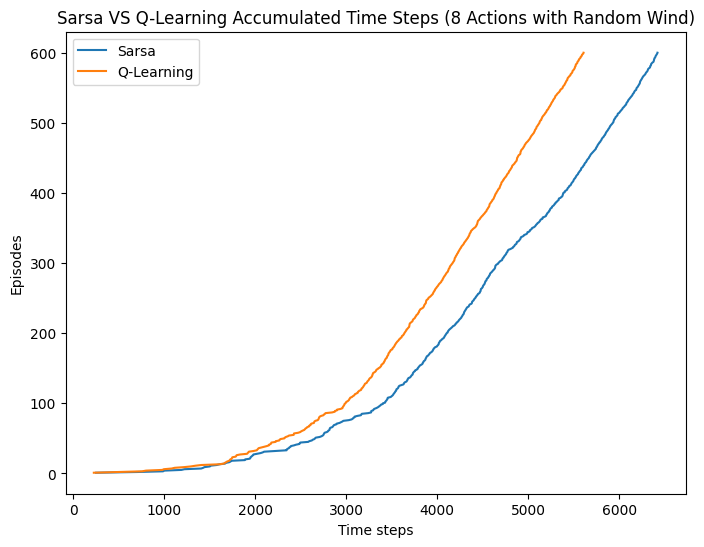

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Time Steps per Episode')

Text(0.5, 1.0, 'Sarsa Vs Q-Learning Convergence (8 Actions with Random Wind)')

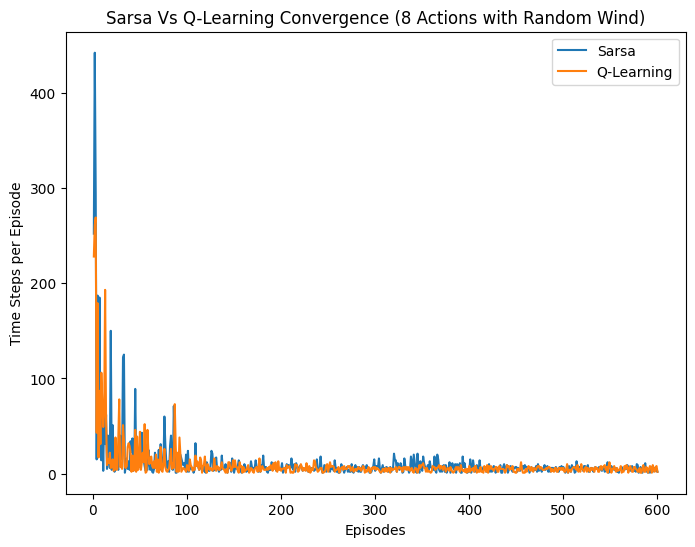

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Episodes')

Text(0, 0.5, 'Accrued Reward per Episode')

Text(0.5, 1.0, 'Sarsa VS Q-Learning Rewards (8 Actions with Random Wind)')

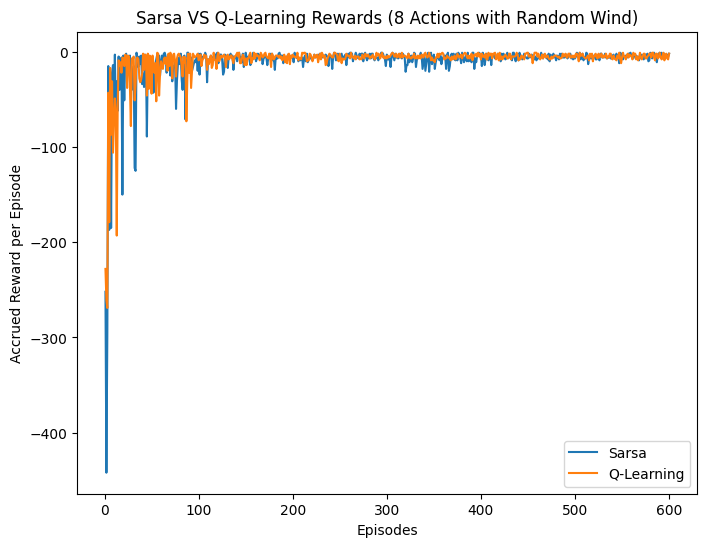

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], np.arange(1, len(sarsa_accum_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), label = 'Sarsa')
plt.plot(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair], np.arange(1, len(ql_accum_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), label = 'Q-Learning')
plt.legend()
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.title('Sarsa VS Q-Learning Accumulated Time Steps (8 Actions with Random Wind)')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_time_steps_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], label = 'Sarsa')
plt.plot(np.arange(1, len(ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_time_steps_per_episode_dict[ql_optimal_epsilon_alpha_pair],label = 'Q-Learning')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Time Steps per Episode')
plt.title('Sarsa Vs Q-Learning Convergence (8 Actions with Random Wind)')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair]) + 1), sarsa_rewards_per_episode_dict[sarsa_optimal_epsilon_alpha_pair], label = 'Sarsa')
plt.plot(np.arange(1, len(ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair]) + 1), ql_rewards_per_episode_dict[ql_optimal_epsilon_alpha_pair],label = 'Q-Learning')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Accrued Reward per Episode')
plt.title('Sarsa VS Q-Learning Rewards (8 Actions with Random Wind)')
plt.show()

